In [2]:
import networkx as nx
import matplotlib.pyplot as ply

%matplotlib inline

In [3]:
from extract_user_reviews import *

In [4]:
import parser

In [5]:
business_users = {}
for user_id in user_review_business.keys():
    if user_review_business[user_id] in business_users.keys():
        business_users[user_review_business[user_id]].append(user_id)
    else:
        business_users[user_review_business[user_id]] = [user_id]

In [12]:
from textblob import TextBlob

g = nx.Graph()
users = parser.getUsers()
for user in users:
    g.add_node(user, 
              friendCount = user.getFriendCount(),
              yelpingSince = user.getYelpingSince())

same_polarity = 0
opposite_polarity = 0
nodes1 = g.nodes()
nodes2 = g.nodes()
for node1 in nodes1:
    for node2 in nodes2:
        if node1.getID() != node2.getID():
            if node1.isFriend(node2.getID()):
                for business_id in business_users.keys():
                    correview_users = business_users[business_id]
                    if node1.getID() in correview_users:
                        if node2.getID() in correview_users:
                            g.add_edge(node1, node2)
                            polarity = []
                            for review1 in user_reviews[node1.getID()]:
                                if review1["business_id"] == business_id:
                                    b = TextBlob(review1["text"])
                                    polarity.append(b.sentiment.polarity)
                                    break
                            for review2 in user_reviews[node2.getID()]:
                                if review2["business_id"] == business_id:
                                    b = TextBlob(review2["text"])
                                    polarity.append(b.sentiment.polarity)
                                    break
                            if (polarity[0] >= 0 and polarity[1] >= 0) or (polarity[1] < 0 and polarity[1] < 0):
                                same_polarity += 1
                            else:
                                opposite_polarity += 1
    nodes2.remove(node1)

print same_polarity
print opposite_polarity

-0.0764814814815
0.151666666667
We are on Holiday from the United States, and Hellers Full Breakfast has been the our first truly regrettable breakfast. We found this place a short walk from our lodgings on Yelp, under Gluten-free Restaurant, it is not a remotely Gluten-free location. After asking about GF options we were greated with the standard song and dance,  we deal with this all the time. Only one person in our group is Gluten-intolerant but everything we ordered was terible. 
Fried and poached eggs so overcooked they would bounce, burned toast, underdone potatoes and bacon, tasteless sausage, cold beans,  oily mushrooms, and the black pudding tasted as if it was made with sawdust. My tea was weak enough to be indistinguishable from dirty water. 
I know that some will discount this because we are American, but we have loved breakfast here just this place was a let down.
--------------------------
Went here based on a Yelp review that they were very good at accommodating allergie

In [13]:
nx.write_gexf(g, "friendship.gexf")

print len(g.edges())
print len(g.nodes())
degree_sequence = []

for degree in g.degree().values():
    degree_sequence.append(degree)

169
3828


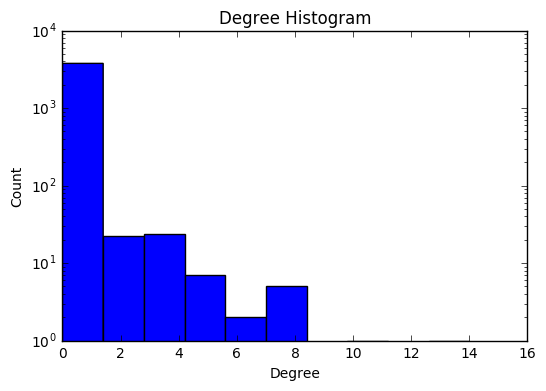

In [14]:
ply.hist(degree_sequence, log=True)
ply.title("Degree Histogram")
ply.ylabel("Count")
ply.xlabel("Degree")
ply.show()

In [21]:
from textblob import TextBlob

g = nx.Graph()
users = parser.getUsers()
for user in users:
    if user.getEliteNum() > 0:
        g.add_node(user)
    
nodes1 = g.nodes()
nodes2 = g.nodes()
for node1 in nodes1:
    for node2 in nodes2:
        if node1.getID() != node2.getID():
            for business_id in business_users.keys():
                correview_users = business_users[business_id]
                if node1.getID() in correview_users:
                    if node2.getID() in correview_users:                        
                        polarity = []
                        for review in user_reviews[node1.getID()]:
                            if review["business_id"] == business_id:
                                b = TextBlob(review["text"])
                                polarity.append(b.sentiment.polarity)
                                break
                        for review in user_reviews[node2.getID()]:
                            if review["business_id"] == business_id:
                                b = TextBlob(review["text"])
                                polarity.append(b.sentiment.polarity)
                                break
                        if (polarity[0] >=0 and polarity[1] < 0) or (polarity[0] < 0 and polarity[1] >= 0):
                            g.add_edge(node1, node2)
    nodes2.remove(node1)

In [16]:
outdeg = g.degree()
to_remove = [n for n in outdeg if outdeg[n] == 0]
g.remove_nodes_from(to_remove)

In [18]:
nx.write_gexf(g, "elite-users-different.gexf")


print (len(g.edges()))
print len(g.nodes())
degree_sequence = []

for degree in g.degree().values():
    degree_sequence.append(degree)

104
123


In [ ]:
ply.hist(degree_sequence, log=True)
ply.title("Degree Histogram")
ply.ylabel("Count")
ply.xlabel("Degree")
ply.show()